Generating data from symbolic model...
Data generation complete.
Calculating Mutual Information matrix...
Calculation complete.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_45656\1711196003.py:103: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df < vmin, "0", df.applymap(lambda x: f"{x:.3f}")


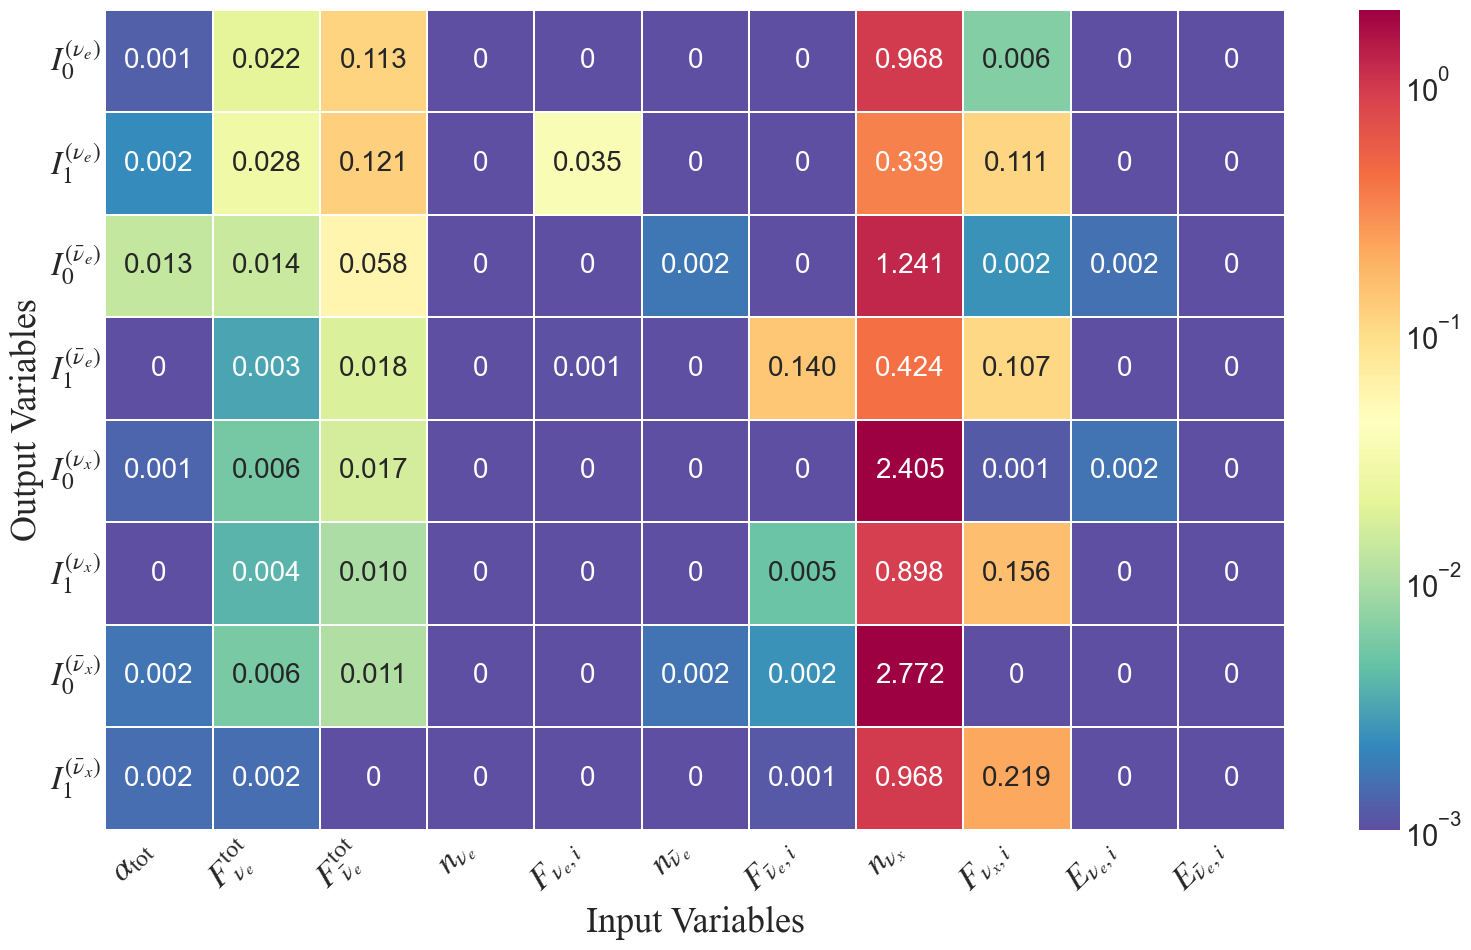

In [ ]:
from matplotlib.ticker import LogFormatterMathtext
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sklearn.feature_selection import mutual_info_regression
import matplotlib.colors as mcolors
import matplotlib as mpl


mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'stix'

x_labels = [
    r'$\alpha_{\mathrm{tot}}$', r'$F_{\nu_e}^{\mathrm{tot}}$', r'$F_{\bar\nu_e}^{\mathrm{tot}}$',
    r'$n_{\nu_e}$', r'$F_{\nu_e,i}$', r'$n_{\bar\nu_e}$', r'$F_{\bar\nu_e,i}$',
    r'$n_{\nu_x}$', r'$F_{\nu_x,i}$', r'$E_{\nu_e,i}$', r'$E_{\bar\nu_e,i}$'
]
y_labels = [
    r'$I_0^{(\nu_e)}$', r'$I_1^{(\nu_e)}$', r'$I_0^{(\bar{\nu}_e)}$', r'$I_1^{(\bar{\nu}_e)}$',
    r'$I_0^{(\nu_x)}$', r'$I_1^{(\nu_x)}$', r'$I_0^{(\bar{\nu}_x)}$', r'$I_1^{(\bar{\nu}_x)}$'
]
generic_vars = [f'x_{i}' for i in range(len(x_labels))]


analytic_model_data = {
    "equations": [
        "0.01241420581936836 + -0.002117913216352463*(x_0) + -0.02494936436414719*(x_1) + 0.06446751952171326*(x_2) + 0.1757289320230484*(x_7) + -0.01204259134829044*(x_8) + 0.01775183342397213*(cos(1*x_0)) + -0.01836088299751282*(sin(1*x_1)) + 0.03000439517199993*(cos(1*x_1)) + 0.04919640347361565*(sin(1*x_2)) + -0.02737060934305191*(cos(1*x_2)) + 0.01438299380242825*(cos(1*x_4)) + 0.1637067198753357*(sin(1*x_7)) + -0.04283741116523743*(cos(1*x_7)) + -0.0100325345993042*(sin(1*x_8)) + 0.01875980943441391*(cos(1*x_8))",
        "-0.01183282118290663*(x_0) + -0.02140488103032112*(x_1) + 0.04156730324029922*(x_2) + 0.03697246313095093*(x_4) + 0.0649663582444191*(x_7) + 0.0400463193655014*(x_8) + 0.03172977641224861*(sin(1*x_0)) + 0.01450894586741924*(cos(1*x_0)) + -0.01657970622181892*(sin(1*x_1)) + 0.01089741289615631*(cos(1*x_1)) + 0.03049828298389912*(sin(1*x_2)) + -0.03025093860924244*(cos(1*x_2)) + -0.01659289374947548*(cos(1*x_4)) + 0.060410525649786*(sin(1*x_7)) + -0.02311142906546593*(cos(1*x_7)) + 0.03407220914959908*(sin(1*x_8)) + -0.02153494954109192*(cos(1*x_8))",
        "0.01304310653358698 + 0.03257213905453682*(x_0) + -0.01719197072088718*(x_1) + 0.04154916852712631*(x_2) + 0.1753832846879959*(x_7) + -0.007032220251858234*(x_8) + -0.01115224324166775*(cos(1*x_0)) + -0.01252586487680674*(sin(1*x_1)) + 0.02553923800587654*(cos(1*x_1)) + 0.0322573259472847*(sin(1*x_2)) + -0.01155612617731094*(cos(1*x_2)) + 0.1633910834789276*(sin(1*x_7)) + -0.04207539558410645*(cos(1*x_7)) + -0.005692305974662304*(sin(1*x_8)) + 0.01715747639536858*(cos(1*x_8))",
        "-0.008519868366420269 + 0.01433029770851135*(x_2) + 0.03904183208942413*(x_6) + 0.1282543241977692*(x_7) + 0.04077894985675812*(x_8) + 0.009779419749975204*(sin(1*x_2)) + -0.01961527392268181*(cos(1*x_2)) + 0.03430794179439545*(sin(1*x_6)) + -0.02534656785428524*(cos(1*x_6)) + 0.03465219959616661*(sin(1*x_8))",
        "0.02392888814210892 + 0.02155822515487671*(x_0) + 0.02131500095129013*(x_1) + -0.02157253958284855*(x_2) + 0.4255918860435486*(x_7) + 0.01413246989250183*(x_8) + 0.01473644748330116*(cos(1*x_0)) + 0.01797835156321526*(sin(1*x_1)) + 0.0139476340264082*(cos(1*x_1)) + -0.01327594369649887*(sin(1*x_2)) + 0.04318141937255859*(cos(1*x_2)) + 0.3964470028877258*(sin(1*x_7)) + -0.1099837645888329*(cos(1*x_7)) + 0.0128313172608614*(sin(1*x_8)) + 0.01909418404102325*(cos(1*x_8))",
        "0.003707504365593195 + 0.00728239119052887*(x_0) + 0.01375501230359077*(x_1) + -0.02296057716012001*(x_2) + -0.004675422795116901*(x_4) + 0.01861210353672504*(x_6) + 0.2187130302190781*(x_7) + 0.0935116708278656*(x_8) + -0.02070346847176552*(sin(1*x_0)) + -0.006497363559901714*(cos(1*x_0)) + 0.01077940315008163*(sin(1*x_1)) + -0.004515238106250763*(cos(1*x_1)) + -0.01657587662339211*(sin(1*x_2)) + 0.0196235291659832*(cos(1*x_2)) + 0.01252313144505024*(cos(1*x_4)) + 0.01996176689863205*(sin(1*x_6)) + 0.00322936475276947*(cos(1*x_6)) + 0.2036512494087219*(sin(1*x_7)) + -0.06538808345794678*(cos(1*x_7)) + 0.07945287227630615*(sin(1*x_8)) + -0.04079661518335342*(cos(1*x_8))",
        "0.003472147742286325 + 0.01230495423078537*(x_0) + 0.01173620950430632*(x_1) + -0.0178266316652298*(x_2) + 0.8293629884719849*(x_7) + -0.007648033555597067*(cos(1*x_0)) + 0.009025946259498596*(sin(1*x_1)) + -0.003800563514232635*(cos(1*x_1)) + -0.01292282715439796*(sin(1*x_2)) + 0.01581070944666862*(cos(1*x_2)) + 0.006629761774092913*(sin(1*x_6)) + -0.0001553129404783249*(cos(1*x_6))",
        "0.002868870506063104 + 0.00730467215180397*(x_0) + 0.009037570096552372*(x_6) + 0.2184859961271286*(x_7) + 0.1009173914790154*(x_8) + -0.009633119218051434*(sin(1*x_0)) + -0.005288737826049328*(cos(1*x_0)) + 0.01222929265350103*(sin(1*x_6)) + 0.007786382455378771*(cos(1*x_6)) + 0.2034096866846085*(sin(1*x_7)) + -0.06623747944831848*(cos(1*x_7)) + 0.08538690954446793*(sin(1*x_8)) + -0.0458223894238472*(cos(1*x_8))"
    ],
    "variables": generic_vars
}



def generate_data_from_model(analytic_data, num_samples=2000, noise_level=0):
    print("Generating data from symbolic model...")
    x_data = pd.DataFrame(
        np.random.rand(num_samples, len(analytic_data['variables'])),
        columns=analytic_data['variables']
    )
    y_data = pd.DataFrame(index=x_data.index)
    symbols = sympy.symbols(analytic_data['variables'])
    
    for i, eq_str in enumerate(analytic_data['equations']):

        expr = sympy.sympify(eq_str)
        func = sympy.lambdify(symbols, expr, 'numpy')
        args = [x_data[s.name] for s in symbols]
        y_calculated = func(*args)
        

        if noise_level > 0:
            noise = noise_level * np.std(y_calculated) * np.random.randn(num_samples)
            y_calculated += noise
            
        y_data[y_labels[i]] = y_calculated
        
    print("Data generation complete.")
    x_data.columns = x_labels
    return pd.concat([y_data, x_data], axis=1)

def calculate_mi_matrix(data, output_vars, input_vars):
    mi_df = pd.DataFrame(index=output_vars, columns=input_vars, dtype=np.float64)
    print("Calculating Mutual Information matrix...")
    
    for y_var in output_vars:
        y = data[y_var].values

        for x_var in input_vars:
            X = data[[x_var]].values
            mi_score = mutual_info_regression(X, y, random_state=42)
            mi_df.loc[y_var, x_var] = mi_score[0]
            
    print("Calculation complete.")
    return mi_df

def plot_heatmap_optimized(
    df,
    title,
    filename="heatmap.pdf",
    figsize=(16, 10),
    title_fontsize=26,
    label_fontsize=26,
    tick_fontsize=24,
    annot_fontsize=20,
    colorbar_tick_fontsize=21,
    cmap='Spectral_r',
    vmin=1e-3,
    vmax=2
):
    fig, ax = plt.subplots(figsize=figsize)
    annot_matrix = np.where(
        df < vmin, "0", df.applymap(lambda x: f"{x:.3f}")
    )
    df_for_plot = df.clip(lower=vmin)
    ticks = [1e-3, 1e-2, 1e-1, 1e0] 
    if vmax > ticks[-1]: 
        ticks.append(vmax)
    cbar_kws = {
        "shrink": 1,
        "ticks": ticks,  
        "format": LogFormatterMathtext(base=10), 
    }
    heatmap = sns.heatmap(
        df_for_plot, annot=annot_matrix, fmt='', cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=.15, ax=ax, cbar_kws=cbar_kws,
        annot_kws={"size": annot_fontsize}
    )
    # ax.set_title(title, fontsize=title_fontsize, fontname='Times New Roman', pad=20)
    ax.set_xlabel('Input Variables', fontsize=label_fontsize, fontname='Times New Roman')
    ax.set_ylabel('Output Variables', fontsize=label_fontsize, fontname='Times New Roman')
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=colorbar_tick_fontsize)
    plt.xticks(rotation=45, ha='right', fontsize=tick_fontsize)
    plt.yticks(rotation=0, fontsize=tick_fontsize)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()


plt.style.use('seaborn-v0_8-whitegrid')


generated_data_df = generate_data_from_model(
    analytic_model_data,
    num_samples=500000,
    noise_level=0
)


mi_matrix_df = calculate_mi_matrix(generated_data_df, y_labels, x_labels)


plot_heatmap_optimized(
    mi_matrix_df,
    'Mutual Information between Inputs and Outputs',
    filename="MI_Heatmap.pdf"
)

LightGBM

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sympy
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatterMathtext 

import shap
import lightgbm as lgb


mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'stix'

x_labels = [
    r'$\alpha_{\mathrm{tot}}$', r'$F_{\nu_e}^{\mathrm{tot}}$', r'$F_{\bar\nu_e}^{\mathrm{tot}}$',
    r'$n_{\nu_e}$', r'$F_{\nu_e,i}$', r'$n_{\bar\nu_e}$', r'$F_{\bar\nu_e,i}$',
    r'$n_{\nu_x}$', r'$F_{\nu_x,i}$', r'$E_{\nu_e,i}$', r'$E_{\bar\nu_e,i}$'
]
x_labels_clean = [
    'alpha_tot', 'F_nue_tot', 'F_nubar_e_tot',
    'n_nue', 'F_nue_i', 'n_nubar_e', 'F_nubar_e_i',
    'n_nux', 'F_nux_i', 'E_nue_i', 'E_nubar_e_i'
]
y_labels = [
    r'$I_0^{(\nu_e)}$', r'$I_1^{(\nu_e)}$', r'$I_0^{(\bar{\nu}_e)}$', r'$I_1^{(\bar{\nu}_e)}$',
    r'$I_0^{(\nu_x)}$', r'$I_1^{(\nu_x)}$', r'$I_0^{(\bar{\nu}_x)}$', r'$I_1^{(\bar{\nu}_x)}$'
]
generic_vars = [f'x_{i}' for i in range(len(x_labels))]


analytic_model_data = {
    "equations": [
        "0.01241420581936836 + -0.002117913216352463*(x_0) + -0.02494936436414719*(x_1) + 0.06446751952171326*(x_2) + 0.1757289320230484*(x_7) + -0.01204259134829044*(x_8) + 0.01775183342397213*(cos(1*x_0)) + -0.01836088299751282*(sin(1*x_1)) + 0.03000439517199993*(cos(1*x_1)) + 0.04919640347361565*(sin(1*x_2)) + -0.02737060934305191*(cos(1*x_2)) + 0.01438299380242825*(cos(1*x_4)) + 0.1637067198753357*(sin(1*x_7)) + -0.04283741116523743*(cos(1*x_7)) + -0.0100325345993042*(sin(1*x_8)) + 0.01875980943441391*(cos(1*x_8))",
        "-0.01183282118290663*(x_0) + -0.02140488103032112*(x_1) + 0.04156730324029922*(x_2) + 0.03697246313095093*(x_4) + 0.0649663582444191*(x_7) + 0.0400463193655014*(x_8) + 0.03172977641224861*(sin(1*x_0)) + 0.01450894586741924*(cos(1*x_0)) + -0.01657970622181892*(sin(1*x_1)) + 0.01089741289615631*(cos(1*x_1)) + 0.03049828298389912*(sin(1*x_2)) + -0.03025093860924244*(cos(1*x_2)) + -0.01659289374947548*(cos(1*x_4)) + 0.060410525649786*(sin(1*x_7)) + -0.02311142906546593*(cos(1*x_7)) + 0.03407220914959908*(sin(1*x_8)) + -0.02153494954109192*(cos(1*x_8))",
        "0.01304310653358698 + 0.03257213905453682*(x_0) + -0.01719197072088718*(x_1) + 0.04154916852712631*(x_2) + 0.1753832846879959*(x_7) + -0.007032220251858234*(x_8) + -0.01115224324166775*(cos(1*x_0)) + -0.01252586487680674*(sin(1*x_1)) + 0.02553923800587654*(cos(1*x_1)) + 0.0322573259472847*(sin(1*x_2)) + -0.01155612617731094*(cos(1*x_2)) + 0.1633910834789276*(sin(1*x_7)) + -0.04207539558410645*(cos(1*x_7)) + -0.005692305974662304*(sin(1*x_8)) + 0.01715747639536858*(cos(1*x_8))",
        "-0.008519868366420269 + 0.01433029770851135*(x_2) + 0.03904183208942413*(x_6) + 0.1282543241977692*(x_7) + 0.04077894985675812*(x_8) + 0.009779419749975204*(sin(1*x_2)) + -0.01961527392268181*(cos(1*x_2)) + 0.03430794179439545*(sin(1*x_6)) + -0.02534656785428524*(cos(1*x_6)) + 0.03465219959616661*(sin(1*x_8))",
        "0.02392888814210892 + 0.02155822515487671*(x_0) + 0.02131500095129013*(x_1) + -0.02157253958284855*(x_2) + 0.4255918860435486*(x_7) + 0.01413246989250183*(x_8) + 0.01473644748330116*(cos(1*x_0)) + 0.01797835156321526*(sin(1*x_1)) + 0.0139476340264082*(cos(1*x_1)) + -0.01327594369649887*(sin(1*x_2)) + 0.04318141937255859*(cos(1*x_2)) + 0.3964470028877258*(sin(1*x_7)) + -0.1099837645888329*(cos(1*x_7)) + 0.0128313172608614*(sin(1*x_8)) + 0.01909418404102325*(cos(1*x_8))",
        "0.003707504365593195 + 0.00728239119052887*(x_0) + 0.01375501230359077*(x_1) + -0.02296057716012001*(x_2) + -0.004675422795116901*(x_4) + 0.01861210353672504*(x_6) + 0.2187130302190781*(x_7) + 0.0935116708278656*(x_8) + -0.02070346847176552*(sin(1*x_0)) + -0.006497363559901714*(cos(1*x_0)) + 0.01077940315008163*(sin(1*x_1)) + -0.004515238106250763*(cos(1*x_1)) + -0.01657587662339211*(sin(1*x_2)) + 0.0196235291659832*(cos(1*x_2)) + 0.01252313144505024*(cos(1*x_4)) + 0.01996176689863205*(sin(1*x_6)) + 0.00322936475276947*(cos(1*x_6)) + 0.2036512494087219*(sin(1*x_7)) + -0.06538808345794678*(cos(1*x_7)) + 0.07945287227630615*(sin(1*x_8)) + -0.04079661518335342*(cos(1*x_8))",
        "0.003472147742286325 + 0.01230495423078537*(x_0) + 0.01173620950430632*(x_1) + -0.0178266316652298*(x_2) + 0.8293629884719849*(x_7) + -0.007648033555597067*(cos(1*x_0)) + 0.009025946259498596*(sin(1*x_1)) + -0.003800563514232635*(cos(1*x_1)) + -0.01292282715439796*(sin(1*x_2)) + 0.01581070944666862*(cos(1*x_2)) + 0.006629761774092913*(sin(1*x_6)) + -0.0001553129404783249*(cos(1*x_6))",
        "0.002868870506063104 + 0.00730467215180397*(x_0) + 0.009037570096552372*(x_6) + 0.2184859961271286*(x_7) + 0.1009173914790154*(x_8) + -0.009633119218051434*(sin(1*x_0)) + -0.005288737826049328*(cos(1*x_0)) + 0.01222929265350103*(sin(1*x_6)) + 0.007786382455378771*(cos(1*x_6)) + 0.2034096866846085*(sin(1*x_7)) + -0.06623747944831848*(cos(1*x_7)) + 0.08538690954446793*(sin(1*x_8)) + -0.0458223894238472*(cos(1*x_8))"
    ],
    "variables": generic_vars
}



def generate_data_from_model(analytic_data, num_samples=2000, noise_level=0):

    print("Generating data from symbolic model...")
    x_data = pd.DataFrame(
        np.random.rand(num_samples, len(analytic_data['variables'])),
        columns=analytic_data['variables']
    )
    y_data = pd.DataFrame(index=x_data.index)
    symbols = sympy.symbols(analytic_data['variables'])

    for i, eq_str in enumerate(analytic_data['equations']):
        expr = sympy.sympify(eq_str)
        func = sympy.lambdify(symbols, expr, 'numpy')
        args = [x_data[s.name] for s in symbols]
        y_calculated = func(*args)

        if noise_level > 0:
            noise = level * np.std(y_calculated) * np.random.randn(num_samples)
            y_calculated += noise

        y_data[y_labels[i]] = y_calculated

    print("Data generation complete.")
    x_data.columns = x_labels_clean
    return pd.concat([y_data, x_data], axis=1)

def calculate_shap_matrix(data, output_vars, input_vars_clean):

    shap_df = pd.DataFrame(index=output_vars, columns=input_vars_clean, dtype=np.float64)
    print("Calculating SHAP contribution matrix...")
    X = data[input_vars_clean]

    for y_var in output_vars:
        print(f"  Training model and explaining output: {y_var}")
        y = data[y_var]
        model = lgb.LGBMRegressor(random_state=42, verbose=-1)
        model.fit(X, y)
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X)
        global_shap_values = np.abs(shap_values).mean(axis=0)
        shap_df.loc[y_var] = global_shap_values

    print("SHAP calculation complete.")
    return shap_df




def plot_shap_heatmap_log_style(
    df,
    title,
    filename="heatmap.pdf",
    figsize=(16, 10),
    title_fontsize=26,
    label_fontsize=26,
    tick_fontsize=24,
    annot_fontsize=20,
    colorbar_tick_fontsize=21,
    cmap='Spectral_r',
    vmin=1e-3, 
    vmax=0.2   
):


    df_to_plot = df.copy()
    df_to_plot.columns = x_labels
    
    fig, ax = plt.subplots(figsize=figsize)
    

    annot_matrix = np.where(
        df_to_plot < vmin, "0", df_to_plot.applymap(lambda x: f"{x:.3f}")
    )
    

    df_clipped = df_to_plot.clip(lower=vmin)
    

    ticks = [1e-3, 1e-2, 1e-1, 1e0] 

    if vmax > ticks[-1]:
        ticks.append(vmax)
    if vmax < ticks[-1] and vmax > ticks[-2]:
        ticks[-1] = vmax


    cbar_kws = {
        "shrink": 1,
        "ticks": ticks,
        "format": LogFormatterMathtext(base=10),
    }


    heatmap = sns.heatmap(
        df_clipped,
        annot=annot_matrix,
        fmt='',
        cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=.15,
        ax=ax,
        cbar_kws=cbar_kws,
        annot_kws={"size": annot_fontsize}
    )

    ax.set_xlabel('Input Variables', fontsize=label_fontsize, fontname='Times New Roman')
    ax.set_ylabel('Output Variables', fontsize=label_fontsize, fontname='Times New Roman')
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=colorbar_tick_fontsize)
    # cbar.set_label('Mean Absolute SHAP Value (Global Contribution)', size=label_fontsize-2)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()





plt.style.use('seaborn-v0_8-whitegrid')


generated_data_df = generate_data_from_model(
    analytic_model_data,
    num_samples=500000,
    noise_level=0
)


shap_matrix_df = calculate_shap_matrix(generated_data_df, y_labels, x_labels_clean)


plot_shap_heatmap_log_style(
    shap_matrix_df,
    'SHAP Global Contribution (Log Scale)',
    filename="SHAP_Heatmap_LightGBM.pdf"
)

RandomForest

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sympy
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatterMathtext 
import shap
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor




mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'stix'

x_labels = [
    r'$\alpha_{\mathrm{tot}}$', r'$F_{\nu_e}^{\mathrm{tot}}$', r'$F_{\bar\nu_e}^{\mathrm{tot}}$',
    r'$n_{\nu_e}$', r'$F_{\nu_e,i}$', r'$n_{\bar\nu_e}$', r'$F_{\bar\nu_e,i}$',
    r'$n_{\nu_x}$', r'$F_{\nu_x,i}$', r'$E_{\nu_e,i}$', r'$E_{\bar\nu_e,i}$'
]
x_labels_clean = [
    'alpha_tot', 'F_nue_tot', 'F_nubar_e_tot',
    'n_nue', 'F_nue_i', 'n_nubar_e', 'F_nubar_e_i',
    'n_nux', 'F_nux_i', 'E_nue_i', 'E_nubar_e_i'
]
y_labels = [
    r'$I_0^{(\nu_e)}$', r'$I_1^{(\nu_e)}$', r'$I_0^{(\bar{\nu}_e)}$', r'$I_1^{(\bar{\nu}_e)}$',
    r'$I_0^{(\nu_x)}$', r'$I_1^{(\nu_x)}$', r'$I_0^{(\bar{\nu}_x)}$', r'$I_1^{(\bar{\nu}_x)}$'
]
generic_vars = [f'x_{i}' for i in range(len(x_labels))]


analytic_model_data = {
    "equations": [
        "0.01241420581936836 + -0.002117913216352463*(x_0) + -0.02494936436414719*(x_1) + 0.06446751952171326*(x_2) + 0.1757289320230484*(x_7) + -0.01204259134829044*(x_8) + 0.01775183342397213*(cos(1*x_0)) + -0.01836088299751282*(sin(1*x_1)) + 0.03000439517199993*(cos(1*x_1)) + 0.04919640347361565*(sin(1*x_2)) + -0.02737060934305191*(cos(1*x_2)) + 0.01438299380242825*(cos(1*x_4)) + 0.1637067198753357*(sin(1*x_7)) + -0.04283741116523743*(cos(1*x_7)) + -0.0100325345993042*(sin(1*x_8)) + 0.01875980943441391*(cos(1*x_8))",
        "-0.01183282118290663*(x_0) + -0.02140488103032112*(x_1) + 0.04156730324029922*(x_2) + 0.03697246313095093*(x_4) + 0.0649663582444191*(x_7) + 0.0400463193655014*(x_8) + 0.03172977641224861*(sin(1*x_0)) + 0.01450894586741924*(cos(1*x_0)) + -0.01657970622181892*(sin(1*x_1)) + 0.01089741289615631*(cos(1*x_1)) + 0.03049828298389912*(sin(1*x_2)) + -0.03025093860924244*(cos(1*x_2)) + -0.01659289374947548*(cos(1*x_4)) + 0.060410525649786*(sin(1*x_7)) + -0.02311142906546593*(cos(1*x_7)) + 0.03407220914959908*(sin(1*x_8)) + -0.02153494954109192*(cos(1*x_8))",
        "0.01304310653358698 + 0.03257213905453682*(x_0) + -0.01719197072088718*(x_1) + 0.04154916852712631*(x_2) + 0.1753832846879959*(x_7) + -0.007032220251858234*(x_8) + -0.01115224324166775*(cos(1*x_0)) + -0.01252586487680674*(sin(1*x_1)) + 0.02553923800587654*(cos(1*x_1)) + 0.0322573259472847*(sin(1*x_2)) + -0.01155612617731094*(cos(1*x_2)) + 0.1633910834789276*(sin(1*x_7)) + -0.04207539558410645*(cos(1*x_7)) + -0.005692305974662304*(sin(1*x_8)) + 0.01715747639536858*(cos(1*x_8))",
        "-0.008519868366420269 + 0.01433029770851135*(x_2) + 0.03904183208942413*(x_6) + 0.1282543241977692*(x_7) + 0.04077894985675812*(x_8) + 0.009779419749975204*(sin(1*x_2)) + -0.01961527392268181*(cos(1*x_2)) + 0.03430794179439545*(sin(1*x_6)) + -0.02534656785428524*(cos(1*x_6)) + 0.03465219959616661*(sin(1*x_8))",
        "0.02392888814210892 + 0.02155822515487671*(x_0) + 0.02131500095129013*(x_1) + -0.02157253958284855*(x_2) + 0.4255918860435486*(x_7) + 0.01413246989250183*(x_8) + 0.01473644748330116*(cos(1*x_0)) + 0.01797835156321526*(sin(1*x_1)) + 0.0139476340264082*(cos(1*x_1)) + -0.01327594369649887*(sin(1*x_2)) + 0.04318141937255859*(cos(1*x_2)) + 0.3964470028877258*(sin(1*x_7)) + -0.1099837645888329*(cos(1*x_7)) + 0.0128313172608614*(sin(1*x_8)) + 0.01909418404102325*(cos(1*x_8))",
        "0.003707504365593195 + 0.00728239119052887*(x_0) + 0.01375501230359077*(x_1) + -0.02296057716012001*(x_2) + -0.004675422795116901*(x_4) + 0.01861210353672504*(x_6) + 0.2187130302190781*(x_7) + 0.0935116708278656*(x_8) + -0.02070346847176552*(sin(1*x_0)) + -0.006497363559901714*(cos(1*x_0)) + 0.01077940315008163*(sin(1*x_1)) + -0.004515238106250763*(cos(1*x_1)) + -0.01657587662339211*(sin(1*x_2)) + 0.0196235291659832*(cos(1*x_2)) + 0.01252313144505024*(cos(1*x_4)) + 0.01996176689863205*(sin(1*x_6)) + 0.00322936475276947*(cos(1*x_6)) + 0.2036512494087219*(sin(1*x_7)) + -0.06538808345794678*(cos(1*x_7)) + 0.07945287227630615*(sin(1*x_8)) + -0.04079661518335342*(cos(1*x_8))",
        "0.003472147742286325 + 0.01230495423078537*(x_0) + 0.01173620950430632*(x_1) + -0.0178266316652298*(x_2) + 0.8293629884719849*(x_7) + -0.007648033555597067*(cos(1*x_0)) + 0.009025946259498596*(sin(1*x_1)) + -0.003800563514232635*(cos(1*x_1)) + -0.01292282715439796*(sin(1*x_2)) + 0.01581070944666862*(cos(1*x_2)) + 0.006629761774092913*(sin(1*x_6)) + -0.0001553129404783249*(cos(1*x_6))",
        "0.002868870506063104 + 0.00730467215180397*(x_0) + 0.009037570096552372*(x_6) + 0.2184859961271286*(x_7) + 0.1009173914790154*(x_8) + -0.009633119218051434*(sin(1*x_0)) + -0.005288737826049328*(cos(1*x_0)) + 0.01222929265350103*(sin(1*x_6)) + 0.007786382455378771*(cos(1*x_6)) + 0.2034096866846085*(sin(1*x_7)) + -0.06623747944831848*(cos(1*x_7)) + 0.08538690954446793*(sin(1*x_8)) + -0.0458223894238472*(cos(1*x_8))"
    ],
    "variables": generic_vars
}



def generate_data_from_model(analytic_data, num_samples=2000, noise_level=0):

    print("Generating data from symbolic model...")
    x_data = pd.DataFrame(
        np.random.rand(num_samples, len(analytic_data['variables'])),
        columns=analytic_data['variables']
    )
    y_data = pd.DataFrame(index=x_data.index)
    symbols = sympy.symbols(analytic_data['variables'])

    for i, eq_str in enumerate(analytic_data['equations']):
        expr = sympy.sympify(eq_str)
        func = sympy.lambdify(symbols, expr, 'numpy')
        args = [x_data[s.name] for s in symbols]
        y_calculated = func(*args)

        if noise_level > 0:
            noise = level * np.std(y_calculated) * np.random.randn(num_samples)
            y_calculated += noise

        y_data[y_labels[i]] = y_calculated

    print("Data generation complete.")
    x_data.columns = x_labels_clean
    return pd.concat([y_data, x_data], axis=1)

def calculate_shap_matrix(data, output_vars, input_vars_clean):
    shap_df = pd.DataFrame(index=output_vars, columns=input_vars_clean, dtype=np.float64)
    print("Calculating SHAP contribution matrix...")
    X = data[input_vars_clean]

    for y_var in output_vars:
        print(f"  Training model and explaining output: {y_var}")
        y = data[y_var]
        model = RandomForestRegressor(n_estimators=100, random_state=42)
        model.fit(X, y)
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X)
        global_shap_values = np.abs(shap_values).mean(axis=0)
        shap_df.loc[y_var] = global_shap_values

    print("SHAP calculation complete.")
    return shap_df




def plot_shap_heatmap_log_style(
    df,
    title,
    filename="heatmap.pdf",
    figsize=(16, 10),
    title_fontsize=26,
    label_fontsize=26,
    tick_fontsize=24,
    annot_fontsize=20,
    colorbar_tick_fontsize=21,
    cmap='Spectral_r',
    vmin=1e-3, 
    vmax=0.2   
):


    df_to_plot = df.copy()
    df_to_plot.columns = x_labels
    
    fig, ax = plt.subplots(figsize=figsize)
    

    annot_matrix = np.where(
        df_to_plot < vmin, "0", df_to_plot.applymap(lambda x: f"{x:.3f}")
    )
    

    df_clipped = df_to_plot.clip(lower=vmin)
    

    ticks = [1e-3, 1e-2, 1e-1, 1e0] 

    if vmax > ticks[-1]:
        ticks.append(vmax)
    if vmax < ticks[-1] and vmax > ticks[-2]:
        ticks[-1] = vmax


    cbar_kws = {
        "shrink": 1,
        "ticks": ticks,
        "format": LogFormatterMathtext(base=10),
    }


    heatmap = sns.heatmap(
        df_clipped,
        annot=annot_matrix,
        fmt='',
        cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=.15,
        ax=ax,
        cbar_kws=cbar_kws,
        annot_kws={"size": annot_fontsize}
    )

    ax.set_xlabel('Input Variables', fontsize=label_fontsize, fontname='Times New Roman')
    ax.set_ylabel('Output Variables', fontsize=label_fontsize, fontname='Times New Roman')
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=colorbar_tick_fontsize)
    # cbar.set_label('Mean Absolute SHAP Value (Global Contribution)', size=label_fontsize-2)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()



plt.style.use('seaborn-v0_8-whitegrid')


generated_data_df = generate_data_from_model(
    analytic_model_data,
    num_samples=50000,
    noise_level=0
)


shap_matrix_df = calculate_shap_matrix(generated_data_df, y_labels, x_labels_clean)


plot_shap_heatmap_log_style(
    shap_matrix_df,
    'SHAP Global Contribution (Log Scale)',
    filename="SHAP_Heatmap_RandomForest.pdf"
)


Generating data from symbolic model...
Data generation complete.
Calculating SHAP contribution matrix...
  Training model and explaining output: $I_0^{(\nu_e)}$


XGBoost

Generating data from symbolic model...
Data generation complete.
Calculating SHAP contribution matrix...
  Training model and explaining output: $I_0^{(\nu_e)}$
  Training model and explaining output: $I_1^{(\nu_e)}$
  Training model and explaining output: $I_0^{(\bar{\nu}_e)}$
  Training model and explaining output: $I_1^{(\bar{\nu}_e)}$
  Training model and explaining output: $I_0^{(\nu_x)}$
  Training model and explaining output: $I_1^{(\nu_x)}$
  Training model and explaining output: $I_0^{(\bar{\nu}_x)}$
  Training model and explaining output: $I_1^{(\bar{\nu}_x)}$
SHAP calculation complete.


C:\Users\shi_h\AppData\Local\Temp\ipykernel_23380\4023188526.py:130: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_to_plot < vmin, "0", df_to_plot.applymap(lambda x: f"{x:.3f}")


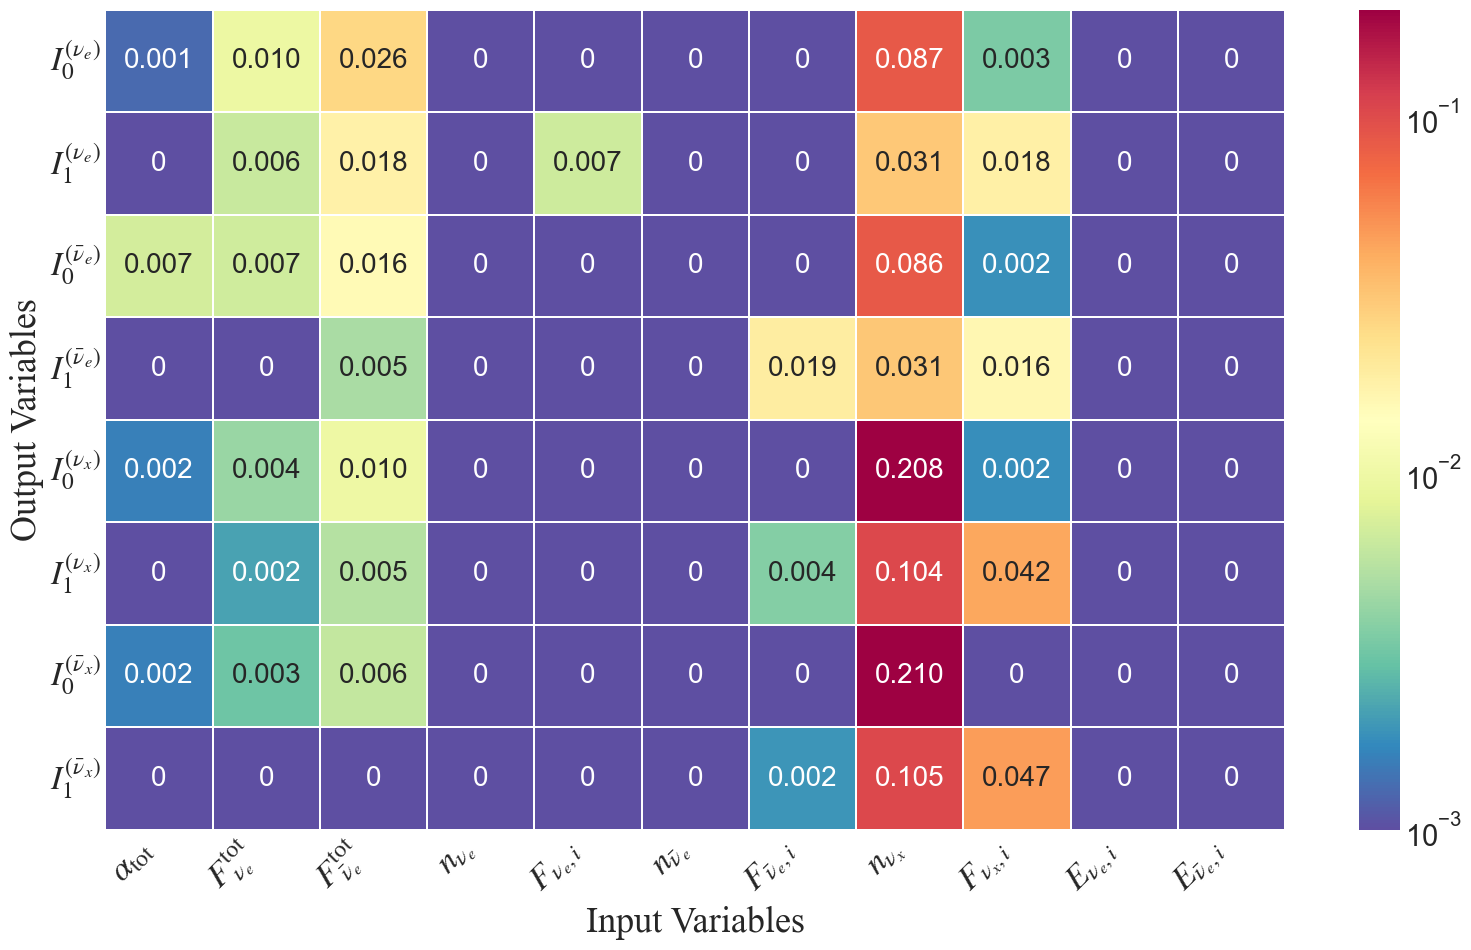

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sympy
import matplotlib as mpl
import matplotlib.colors as mcolors
from matplotlib.ticker import LogFormatterMathtext 
import shap
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb




mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['mathtext.fontset'] = 'stix'

x_labels = [
    r'$\alpha_{\mathrm{tot}}$', r'$F_{\nu_e}^{\mathrm{tot}}$', r'$F_{\bar\nu_e}^{\mathrm{tot}}$',
    r'$n_{\nu_e}$', r'$F_{\nu_e,i}$', r'$n_{\bar\nu_e}$', r'$F_{\bar\nu_e,i}$',
    r'$n_{\nu_x}$', r'$F_{\nu_x,i}$', r'$E_{\nu_e,i}$', r'$E_{\bar\nu_e,i}$'
]
x_labels_clean = [
    'alpha_tot', 'F_nue_tot', 'F_nubar_e_tot',
    'n_nue', 'F_nue_i', 'n_nubar_e', 'F_nubar_e_i',
    'n_nux', 'F_nux_i', 'E_nue_i', 'E_nubar_e_i'
]
y_labels = [
    r'$I_0^{(\nu_e)}$', r'$I_1^{(\nu_e)}$', r'$I_0^{(\bar{\nu}_e)}$', r'$I_1^{(\bar{\nu}_e)}$',
    r'$I_0^{(\nu_x)}$', r'$I_1^{(\nu_x)}$', r'$I_0^{(\bar{\nu}_x)}$', r'$I_1^{(\bar{\nu}_x)}$'
]
generic_vars = [f'x_{i}' for i in range(len(x_labels))]


analytic_model_data = {
    "equations": [
        "0.01241420581936836 + -0.002117913216352463*(x_0) + -0.02494936436414719*(x_1) + 0.06446751952171326*(x_2) + 0.1757289320230484*(x_7) + -0.01204259134829044*(x_8) + 0.01775183342397213*(cos(1*x_0)) + -0.01836088299751282*(sin(1*x_1)) + 0.03000439517199993*(cos(1*x_1)) + 0.04919640347361565*(sin(1*x_2)) + -0.02737060934305191*(cos(1*x_2)) + 0.01438299380242825*(cos(1*x_4)) + 0.1637067198753357*(sin(1*x_7)) + -0.04283741116523743*(cos(1*x_7)) + -0.0100325345993042*(sin(1*x_8)) + 0.01875980943441391*(cos(1*x_8))",
        "-0.01183282118290663*(x_0) + -0.02140488103032112*(x_1) + 0.04156730324029922*(x_2) + 0.03697246313095093*(x_4) + 0.0649663582444191*(x_7) + 0.0400463193655014*(x_8) + 0.03172977641224861*(sin(1*x_0)) + 0.01450894586741924*(cos(1*x_0)) + -0.01657970622181892*(sin(1*x_1)) + 0.01089741289615631*(cos(1*x_1)) + 0.03049828298389912*(sin(1*x_2)) + -0.03025093860924244*(cos(1*x_2)) + -0.01659289374947548*(cos(1*x_4)) + 0.060410525649786*(sin(1*x_7)) + -0.02311142906546593*(cos(1*x_7)) + 0.03407220914959908*(sin(1*x_8)) + -0.02153494954109192*(cos(1*x_8))",
        "0.01304310653358698 + 0.03257213905453682*(x_0) + -0.01719197072088718*(x_1) + 0.04154916852712631*(x_2) + 0.1753832846879959*(x_7) + -0.007032220251858234*(x_8) + -0.01115224324166775*(cos(1*x_0)) + -0.01252586487680674*(sin(1*x_1)) + 0.02553923800587654*(cos(1*x_1)) + 0.0322573259472847*(sin(1*x_2)) + -0.01155612617731094*(cos(1*x_2)) + 0.1633910834789276*(sin(1*x_7)) + -0.04207539558410645*(cos(1*x_7)) + -0.005692305974662304*(sin(1*x_8)) + 0.01715747639536858*(cos(1*x_8))",
        "-0.008519868366420269 + 0.01433029770851135*(x_2) + 0.03904183208942413*(x_6) + 0.1282543241977692*(x_7) + 0.04077894985675812*(x_8) + 0.009779419749975204*(sin(1*x_2)) + -0.01961527392268181*(cos(1*x_2)) + 0.03430794179439545*(sin(1*x_6)) + -0.02534656785428524*(cos(1*x_6)) + 0.03465219959616661*(sin(1*x_8))",
        "0.02392888814210892 + 0.02155822515487671*(x_0) + 0.02131500095129013*(x_1) + -0.02157253958284855*(x_2) + 0.4255918860435486*(x_7) + 0.01413246989250183*(x_8) + 0.01473644748330116*(cos(1*x_0)) + 0.01797835156321526*(sin(1*x_1)) + 0.0139476340264082*(cos(1*x_1)) + -0.01327594369649887*(sin(1*x_2)) + 0.04318141937255859*(cos(1*x_2)) + 0.3964470028877258*(sin(1*x_7)) + -0.1099837645888329*(cos(1*x_7)) + 0.0128313172608614*(sin(1*x_8)) + 0.01909418404102325*(cos(1*x_8))",
        "0.003707504365593195 + 0.00728239119052887*(x_0) + 0.01375501230359077*(x_1) + -0.02296057716012001*(x_2) + -0.004675422795116901*(x_4) + 0.01861210353672504*(x_6) + 0.2187130302190781*(x_7) + 0.0935116708278656*(x_8) + -0.02070346847176552*(sin(1*x_0)) + -0.006497363559901714*(cos(1*x_0)) + 0.01077940315008163*(sin(1*x_1)) + -0.004515238106250763*(cos(1*x_1)) + -0.01657587662339211*(sin(1*x_2)) + 0.0196235291659832*(cos(1*x_2)) + 0.01252313144505024*(cos(1*x_4)) + 0.01996176689863205*(sin(1*x_6)) + 0.00322936475276947*(cos(1*x_6)) + 0.2036512494087219*(sin(1*x_7)) + -0.06538808345794678*(cos(1*x_7)) + 0.07945287227630615*(sin(1*x_8)) + -0.04079661518335342*(cos(1*x_8))",
        "0.003472147742286325 + 0.01230495423078537*(x_0) + 0.01173620950430632*(x_1) + -0.0178266316652298*(x_2) + 0.8293629884719849*(x_7) + -0.007648033555597067*(cos(1*x_0)) + 0.009025946259498596*(sin(1*x_1)) + -0.003800563514232635*(cos(1*x_1)) + -0.01292282715439796*(sin(1*x_2)) + 0.01581070944666862*(cos(1*x_2)) + 0.006629761774092913*(sin(1*x_6)) + -0.0001553129404783249*(cos(1*x_6))",
        "0.002868870506063104 + 0.00730467215180397*(x_0) + 0.009037570096552372*(x_6) + 0.2184859961271286*(x_7) + 0.1009173914790154*(x_8) + -0.009633119218051434*(sin(1*x_0)) + -0.005288737826049328*(cos(1*x_0)) + 0.01222929265350103*(sin(1*x_6)) + 0.007786382455378771*(cos(1*x_6)) + 0.2034096866846085*(sin(1*x_7)) + -0.06623747944831848*(cos(1*x_7)) + 0.08538690954446793*(sin(1*x_8)) + -0.0458223894238472*(cos(1*x_8))"
    ],
    "variables": generic_vars
}



def generate_data_from_model(analytic_data, num_samples=2000, noise_level=0):

    print("Generating data from symbolic model...")
    x_data = pd.DataFrame(
        np.random.rand(num_samples, len(analytic_data['variables'])),
        columns=analytic_data['variables']
    )
    y_data = pd.DataFrame(index=x_data.index)
    symbols = sympy.symbols(analytic_data['variables'])

    for i, eq_str in enumerate(analytic_data['equations']):
        expr = sympy.sympify(eq_str)
        func = sympy.lambdify(symbols, expr, 'numpy')
        args = [x_data[s.name] for s in symbols]
        y_calculated = func(*args)

        if noise_level > 0:
            noise = level * np.std(y_calculated) * np.random.randn(num_samples)
            y_calculated += noise

        y_data[y_labels[i]] = y_calculated

    print("Data generation complete.")
    x_data.columns = x_labels_clean
    return pd.concat([y_data, x_data], axis=1)

def calculate_shap_matrix(data, output_vars, input_vars_clean):

    shap_df = pd.DataFrame(index=output_vars, columns=input_vars_clean, dtype=np.float64)
    print("Calculating SHAP contribution matrix...")
    X = data[input_vars_clean]

    for y_var in output_vars:
        print(f"  Training model and explaining output: {y_var}")
        y = data[y_var]
        model = xgb.XGBRegressor(random_state=42, verbosity=0)
        model.fit(X, y)
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X)
        global_shap_values = np.abs(shap_values).mean(axis=0)
        shap_df.loc[y_var] = global_shap_values

    print("SHAP calculation complete.")
    return shap_df



def plot_shap_heatmap_log_style(
    df,
    title,
    filename="heatmap.pdf",
    figsize=(16, 10),
    title_fontsize=26,
    label_fontsize=26,
    tick_fontsize=24,
    annot_fontsize=20,
    colorbar_tick_fontsize=21,
    cmap='Spectral_r',
    vmin=1e-3, 
    vmax=0.2   
):


    df_to_plot = df.copy()
    df_to_plot.columns = x_labels
    
    fig, ax = plt.subplots(figsize=figsize)
    

    annot_matrix = np.where(
        df_to_plot < vmin, "0", df_to_plot.applymap(lambda x: f"{x:.3f}")
    )
    

    df_clipped = df_to_plot.clip(lower=vmin)
    

    ticks = [1e-3, 1e-2, 1e-1, 1e0] 

    if vmax > ticks[-1]:
        ticks.append(vmax)
    if vmax < ticks[-1] and vmax > ticks[-2]:
        ticks[-1] = vmax


    cbar_kws = {
        "shrink": 1,
        "ticks": ticks,
        "format": LogFormatterMathtext(base=10),
    }


    heatmap = sns.heatmap(
        df_clipped,
        annot=annot_matrix,
        fmt='',
        cmap=cmap,
        norm=mcolors.LogNorm(vmin=vmin, vmax=vmax),
        linewidths=.15,
        ax=ax,
        cbar_kws=cbar_kws,
        annot_kws={"size": annot_fontsize}
    )

    ax.set_xlabel('Input Variables', fontsize=label_fontsize, fontname='Times New Roman')
    ax.set_ylabel('Output Variables', fontsize=label_fontsize, fontname='Times New Roman')
    ax.tick_params(axis='x', labelsize=tick_fontsize)
    ax.tick_params(axis='y', labelsize=tick_fontsize)
    
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=colorbar_tick_fontsize)
    # cbar.set_label('Mean Absolute SHAP Value (Global Contribution)', size=label_fontsize-2)

    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.show()



plt.style.use('seaborn-v0_8-whitegrid')


generated_data_df = generate_data_from_model(
    analytic_model_data,
    num_samples=50000,
    noise_level=0
)


shap_matrix_df = calculate_shap_matrix(generated_data_df, y_labels, x_labels_clean)

plot_shap_heatmap_log_style(
    shap_matrix_df,
    'SHAP Global Contribution (Log Scale)',
    filename="SHAP_Heatmap_XGBoost.pdf"
)
